## **Lab 8 - Dense Neural Network**
#### Name: **Chitrank Dave**
#### Student #: **8938766**

Imports

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


from tensorflow import keras

from keras.datasets import mnist
from keras import layers

#### **1. Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with**



In [2]:
f_mnist = keras.datasets.fashion_mnist.load_data()

(train_images, train_labels), (test_images, test_labels) = f_mnist

In [3]:
print("Number of training images:", train_images.shape[0])
print("Number of testing images:", test_images.shape[0])

Number of training images: 60000
Number of testing images: 10000


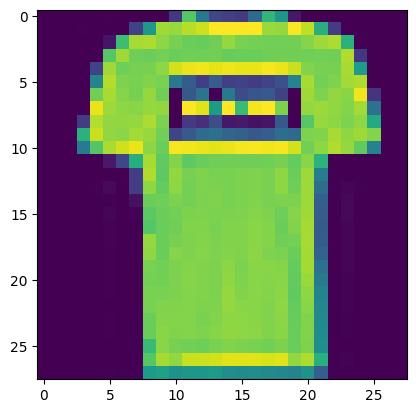

In [4]:
plt.imshow(train_images[1]) 

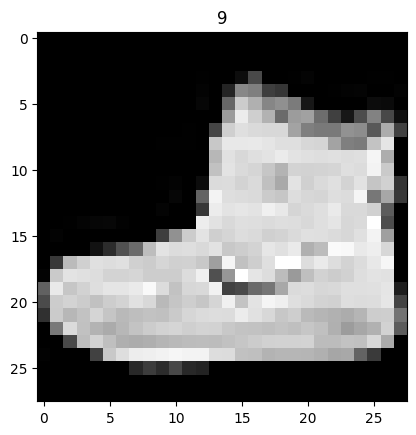

In [5]:
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.title(train_labels[0])
plt.show()

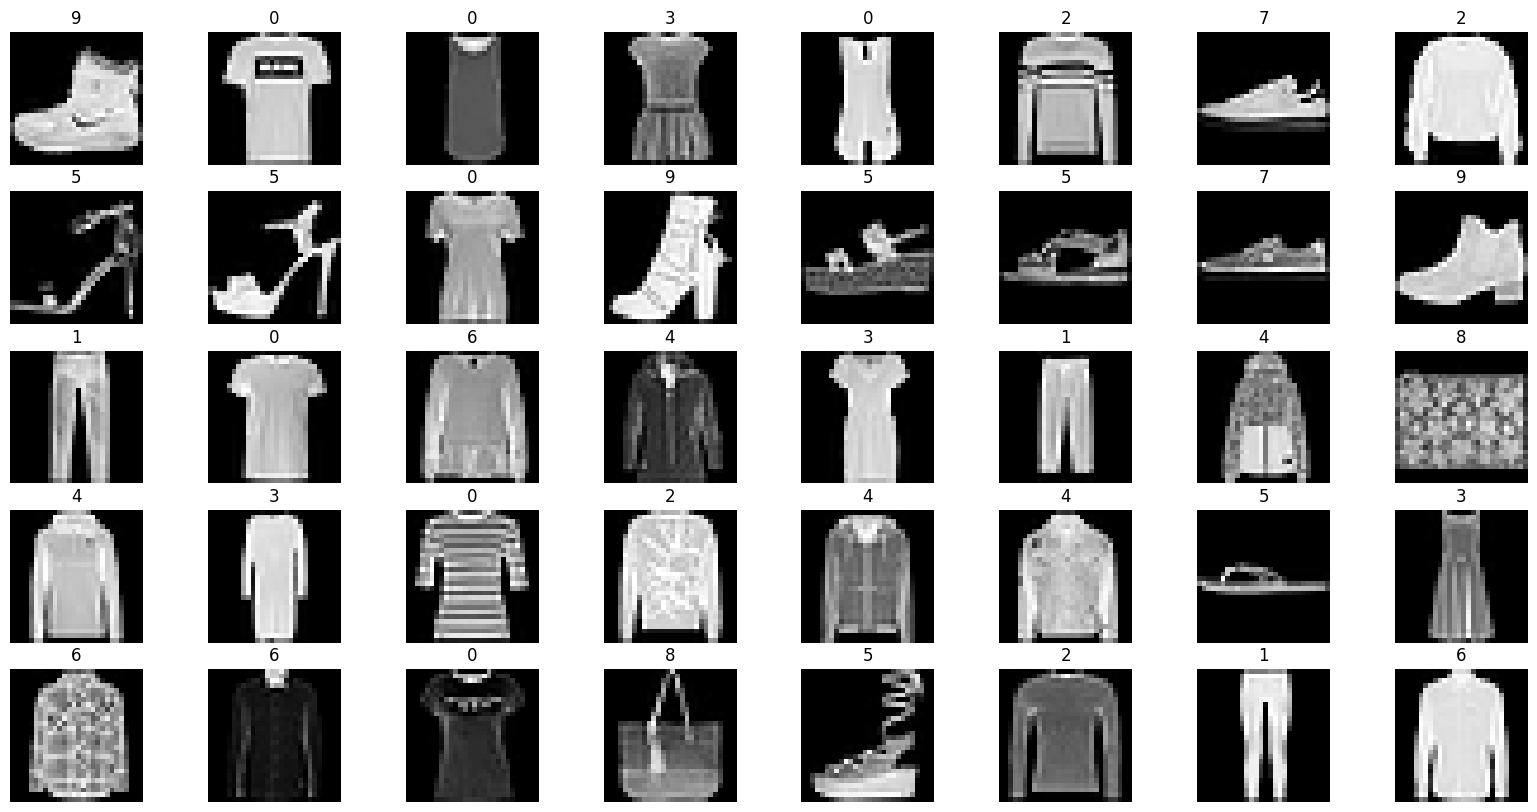

In [6]:
plt.figure(figsize=(20, 10))
for i in range(40):
    plt.subplot(5, 8, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(train_labels[i])
    plt.axis('off')
plt.show()

In [7]:
print(train_images.min())
print(train_images.max())
print(train_images.shape)
print(train_images[0].shape)

0
255
(60000, 28, 28)
(28, 28)


In [8]:
mean = train_images.mean(axis=(0, 1, 2))
std = train_images.std(axis=(0, 1, 2))
print("Mean of training images:", mean)
print("Standard deviation of training images:", std)

Mean of training images: 72.94035223214286
Standard deviation of training images: 90.02118235130519


In [9]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

print("Shape of training images after normalization:", train_images.shape)
print("Shape of testing images after normalization:", test_images.shape)

Shape of training images after normalization: (60000, 28, 28)
Shape of testing images after normalization: (10000, 28, 28)


---
#### **2. Train a dense neural network using Keras, try out at least three hyperparameters configurations**


In [10]:
def create_model(num_units_1, model_seq):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(num_units_1, activation='relu'),
        keras.layers.Dense(10, activation='softmax'),
    ], name='Model_{}'.format(model_seq))
    model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model    


In [11]:
configurations = [(1, 128, 512, 15), (2, 256, 256, 8), (3, 512, 64, 5), (4, 128, 64, 20)]
models_list = []
for model_seq, num_units_1, batch_size, epochs in configurations:
    print('---Model {}---'.format(model_seq))
    print('Configuration: (nuerons: {}, batch size: {})'.format(num_units_1, batch_size))
    model = create_model(num_units_1, model_seq)
    model.fit(train_images, train_labels, epochs = epochs, batch_size = batch_size)
    models_list.append(model)
    print('---Testing---')
    test_loss, test_accuracy = model.evaluate(test_images, test_labels)
    print('Test loss:', test_loss)
    print('Test accuracy:', test_accuracy)
    print()

---Model 1---
Configuration: (nuerons: 128, batch size: 512)


2023-11-18 21:05:44.648444: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-18 21:05:44.648468: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-18 21:05:44.648474: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-18 21:05:44.648510: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-18 21:05:44.648530: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/15


2023-11-18 21:05:45.169391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


118/118 [==============================] - 2s 10ms/step - loss: 0.8086 - accuracy: 0.7233
Epoch 2/15
118/118 [==============================] - 1s 10ms/step - loss: 0.5602 - accuracy: 0.8039
Epoch 3/15
118/118 [==============================] - 1s 10ms/step - loss: 0.5184 - accuracy: 0.8194
Epoch 4/15
118/118 [==============================] - 1s 9ms/step - loss: 0.4948 - accuracy: 0.8268
Epoch 5/15
118/118 [==============================] - 1s 9ms/step - loss: 0.4829 - accuracy: 0.8310
Epoch 6/15
118/118 [==============================] - 1s 9ms/step - loss: 0.4702 - accuracy: 0.8345
Epoch 7/15
118/118 [==============================] - 1s 10ms/step - loss: 0.4618 - accuracy: 0.8388
Epoch 8/15
118/118 [==============================] - 1s 9ms/step - loss: 0.4557 - accuracy: 0.8415
Epoch 9/15
118/118 [==============================] - 1s 9ms/step - loss: 0.4488 - accuracy: 0.8433
Epoch 10/15
118/118 [==============================] - 1s 9ms/step - loss: 0.4459 - accuracy: 0.8444
Epoch 

---
#### **3. Evaluate its accuracy for each of the configurations. Choose the best configuration, and: Report its accuracy, confusion metric, and specific examples of incorrect classification, and drew some conclusions from this exploration**

In [12]:
predictions_list = []
for model in models_list:
    print(model.summary())
    predictions = model.predict(test_images)
    predictions = np.argmax(predictions, axis=1)
    predictions_list.append(predictions)
    confusion_matrix = tf.math.confusion_matrix(test_labels, predictions)
    print('Confusion matrix:')
    print(confusion_matrix)
    print()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
313/313 [==============================] - 1s 2ms/step
Confusion matrix:
tf.Tensor(
[[865   2   5  76   7   0  33   0  11   1]
 [  4 948   1  36   5   0   5   0   1   0]
 [ 53   4 430  24 336   1 143   0   9   0]
 [ 32   6   0 921  25   1  10   0   5   0]
 [  1   1  18  63 864 

		*****************************
		******* Model: Model_1 *******
		*****************************

Incorrect classification:
Actual label: 7
Predicted label: 5


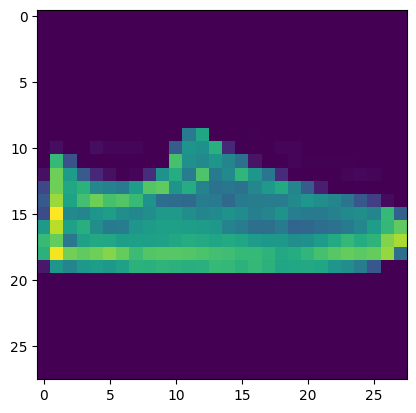

------******------

Incorrect classification:
Actual label: 2
Predicted label: 0


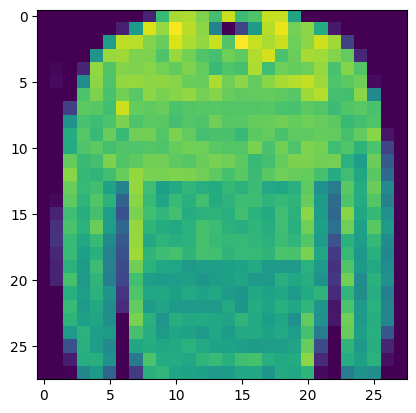

------******------

Incorrect classification:
Actual label: 5
Predicted label: 7


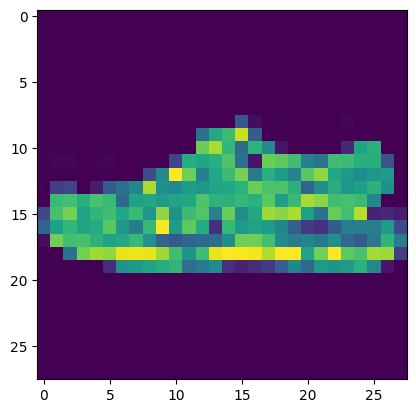

------******------

Incorrect classification:
Actual label: 9
Predicted label: 7


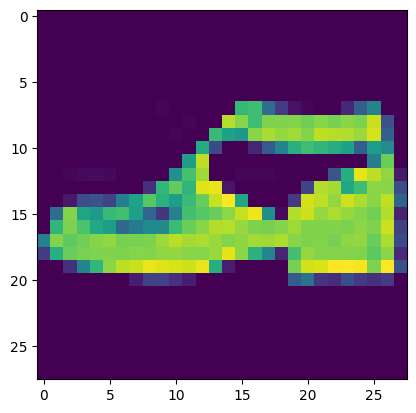

------******------

Incorrect classification:
Actual label: 4
Predicted label: 2


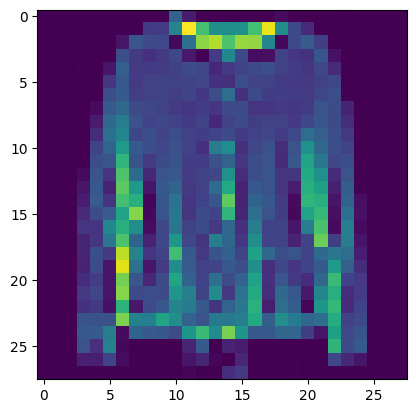

------******------

Incorrect classification:
Actual label: 7
Predicted label: 5


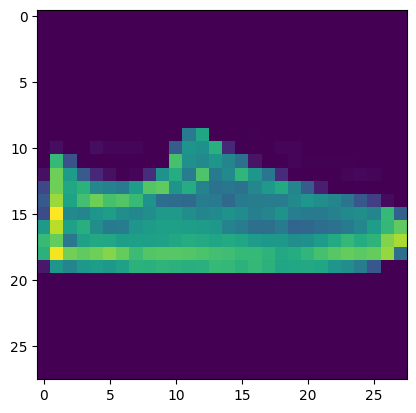

------******------

Incorrect classification:
Actual label: 4
Predicted label: 8


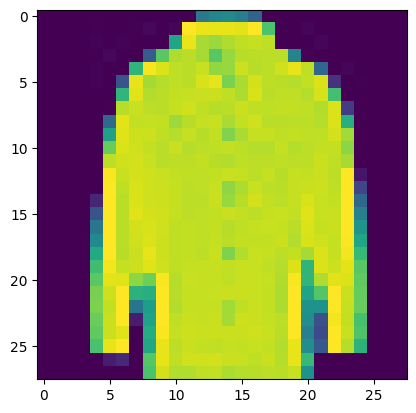

------******------

Incorrect classification:
Actual label: 9
Predicted label: 5


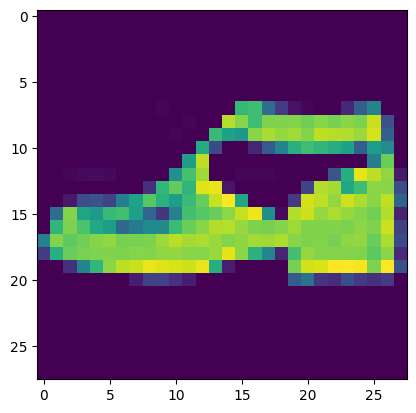

------******------

Incorrect classification:
Actual label: 4
Predicted label: 2


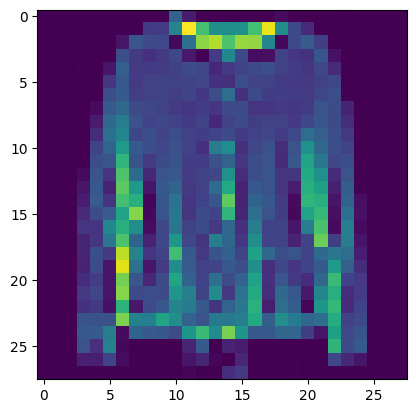

------******------

Incorrect classification:
Actual label: 0
Predicted label: 3


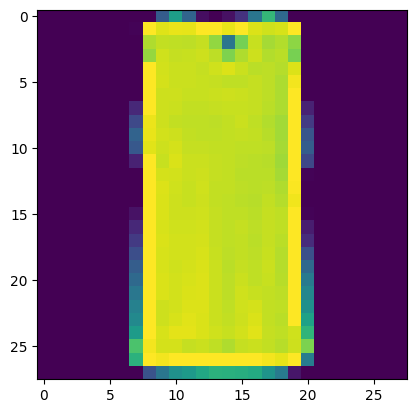

------******------

Incorrect classification:
Actual label: 2
Predicted label: 6


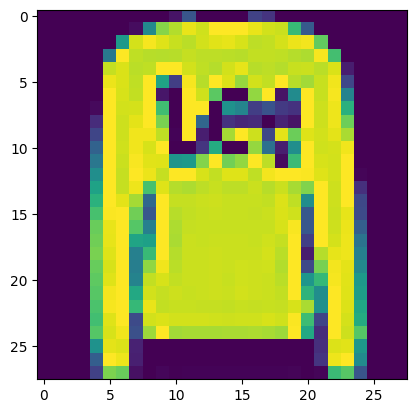

------******------

Incorrect classification:
Actual label: 7
Predicted label: 5


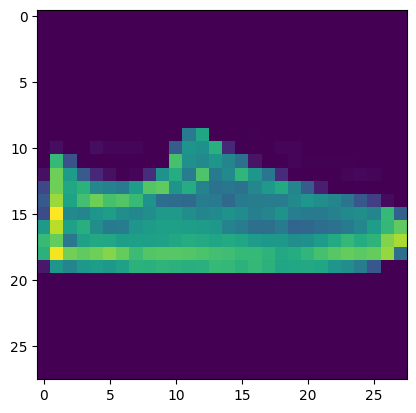

------******------

Incorrect classification:
Actual label: 2
Predicted label: 6


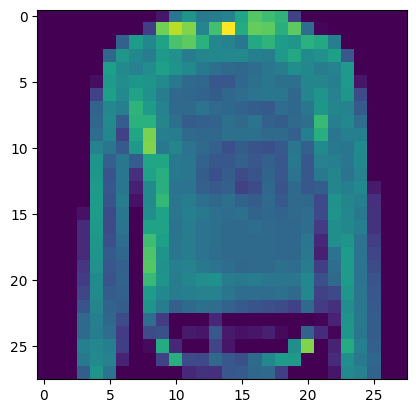

------******------

Incorrect classification:
Actual label: 0
Predicted label: 6


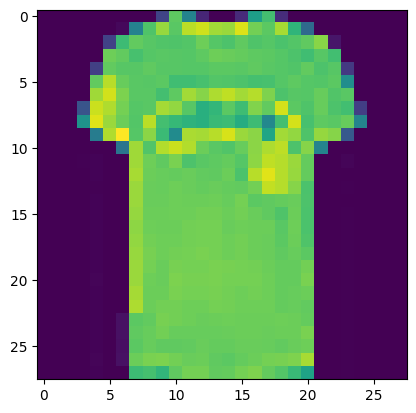

------******------

Incorrect classification:
Actual label: 2
Predicted label: 6


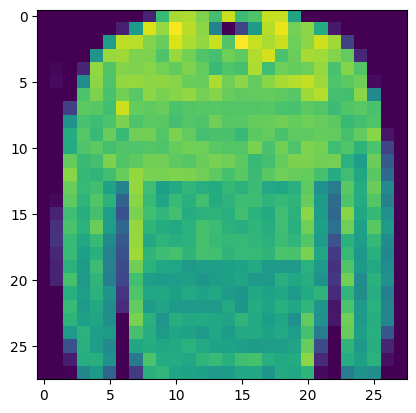

------******------

Incorrect classification:
Actual label: 7
Predicted label: 5


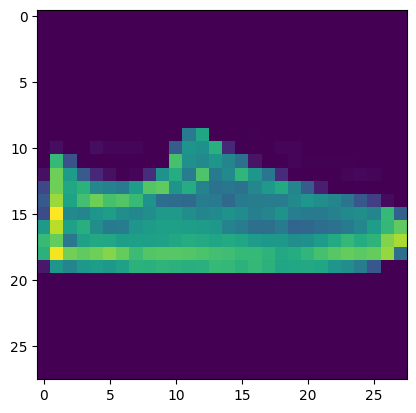

------******------

Incorrect classification:
Actual label: 4
Predicted label: 2


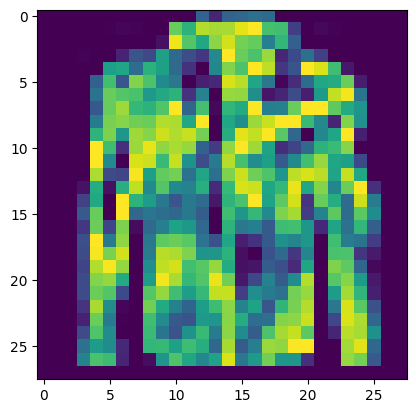

------******------

Incorrect classification:
Actual label: 2
Predicted label: 0


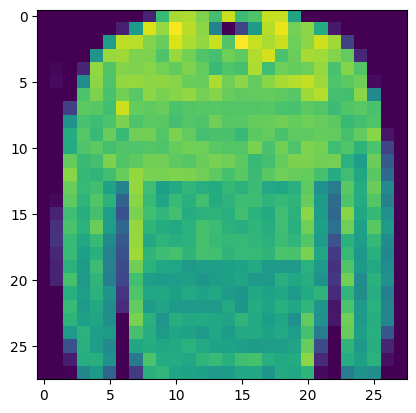

------******------

Incorrect classification:
Actual label: 4
Predicted label: 2


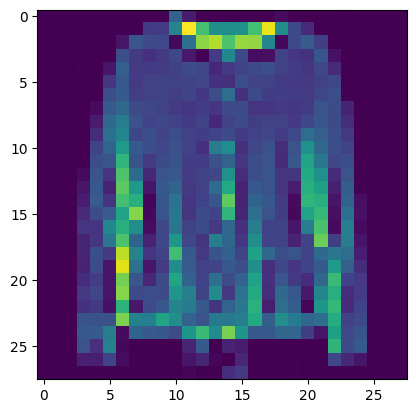

------******------

Incorrect classification:
Actual label: 3
Predicted label: 4


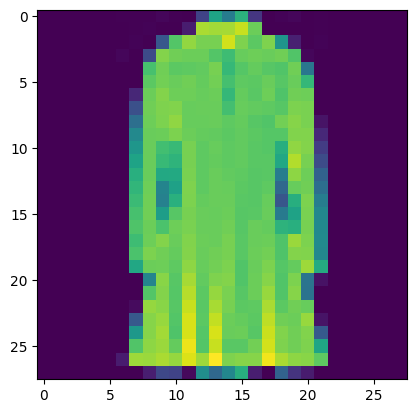

------******------

		*****************************
		******* Model: Model_2 *******
		*****************************

Incorrect classification:
Actual label: 7
Predicted label: 5


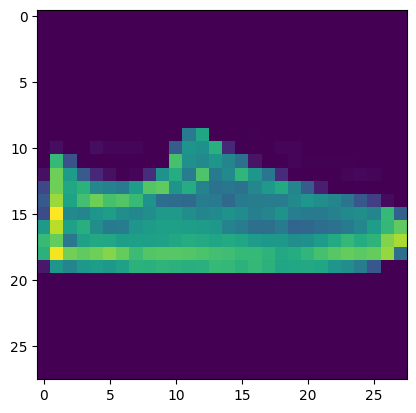

------******------

Incorrect classification:
Actual label: 2
Predicted label: 0


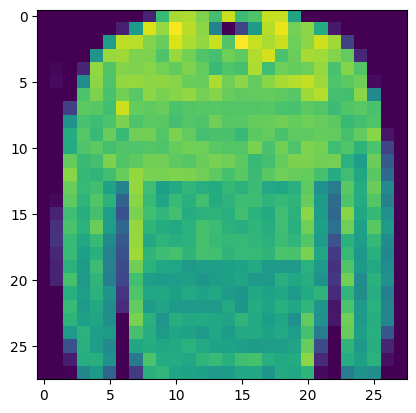

------******------

Incorrect classification:
Actual label: 5
Predicted label: 7


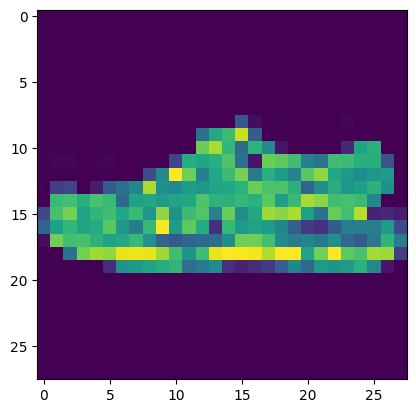

------******------

Incorrect classification:
Actual label: 9
Predicted label: 7


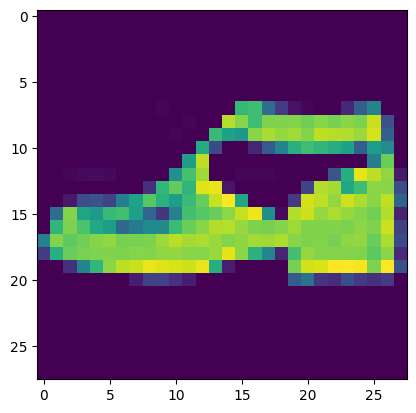

------******------

Incorrect classification:
Actual label: 4
Predicted label: 2


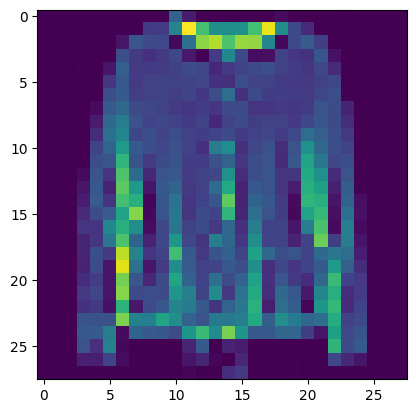

------******------

Incorrect classification:
Actual label: 7
Predicted label: 5


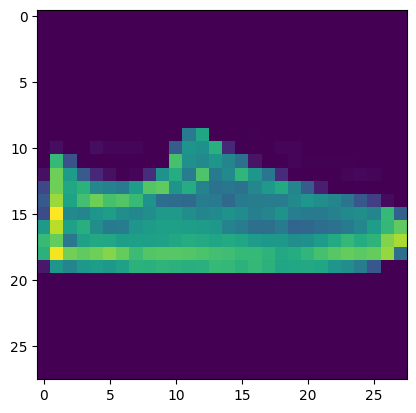

------******------

Incorrect classification:
Actual label: 4
Predicted label: 8


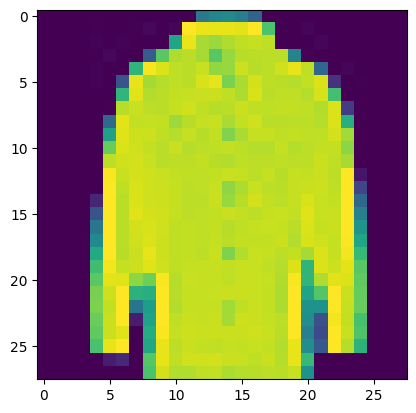

------******------

Incorrect classification:
Actual label: 9
Predicted label: 5


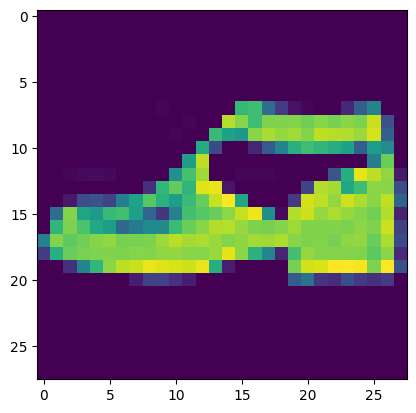

------******------

Incorrect classification:
Actual label: 4
Predicted label: 2


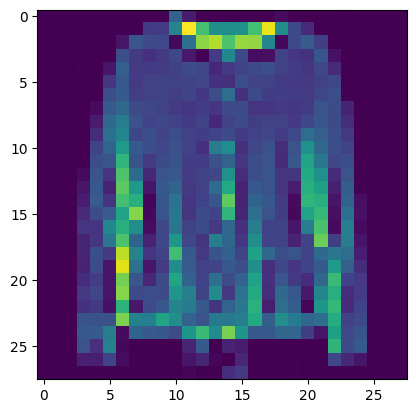

------******------

Incorrect classification:
Actual label: 0
Predicted label: 3


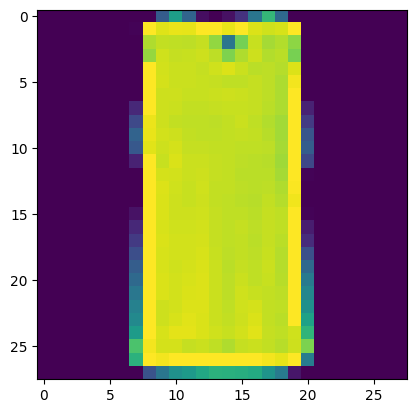

------******------

Incorrect classification:
Actual label: 2
Predicted label: 6


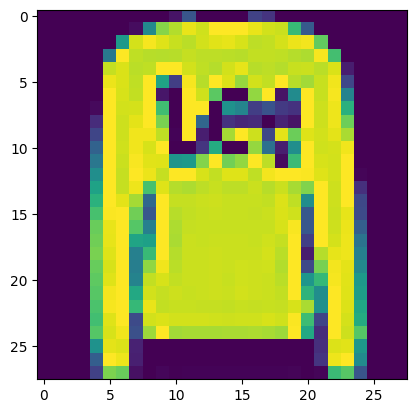

------******------

Incorrect classification:
Actual label: 7
Predicted label: 5


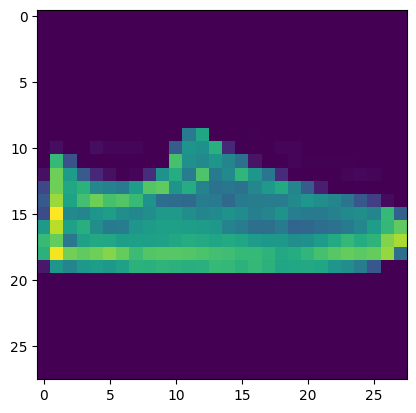

------******------

Incorrect classification:
Actual label: 2
Predicted label: 6


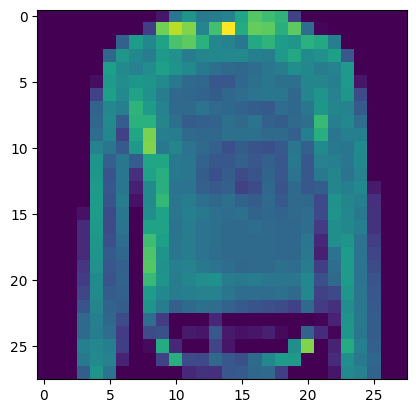

------******------

Incorrect classification:
Actual label: 0
Predicted label: 6


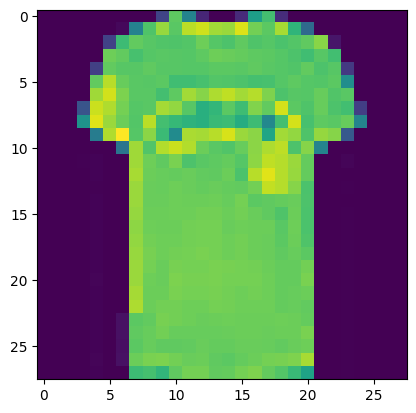

------******------

Incorrect classification:
Actual label: 2
Predicted label: 6


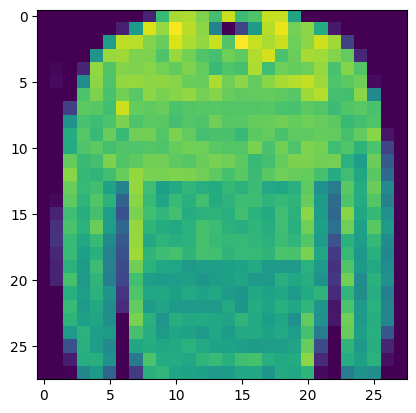

------******------

Incorrect classification:
Actual label: 7
Predicted label: 5


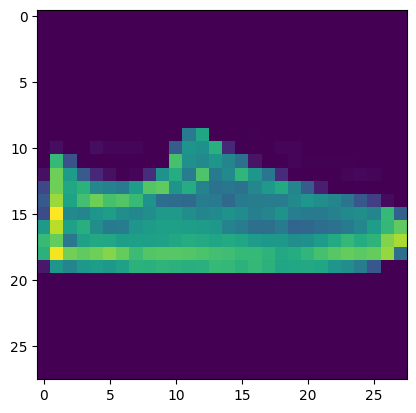

------******------

Incorrect classification:
Actual label: 4
Predicted label: 2


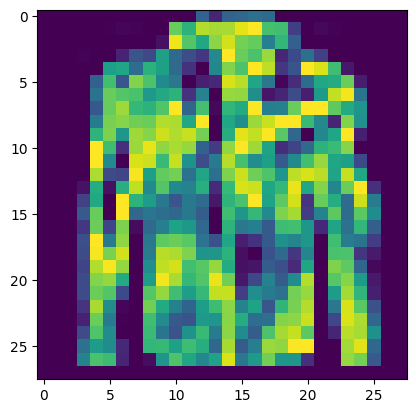

------******------

Incorrect classification:
Actual label: 2
Predicted label: 0


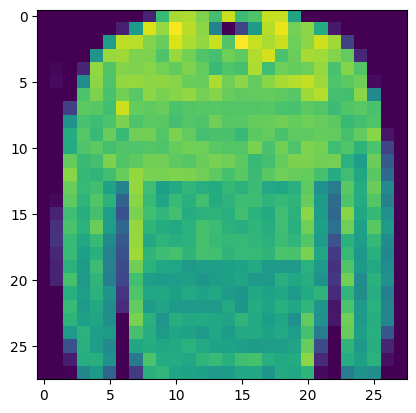

------******------

Incorrect classification:
Actual label: 4
Predicted label: 2


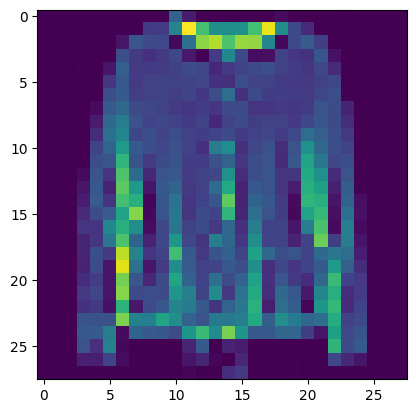

------******------

Incorrect classification:
Actual label: 3
Predicted label: 4


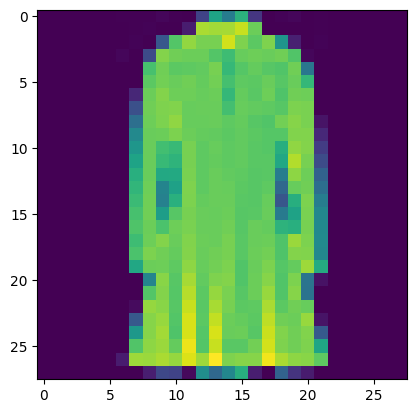

------******------

		*****************************
		******* Model: Model_3 *******
		*****************************

Incorrect classification:
Actual label: 7
Predicted label: 5


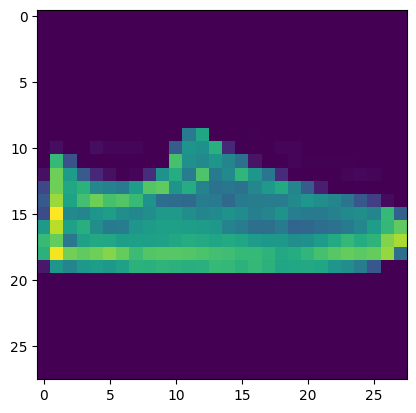

------******------

Incorrect classification:
Actual label: 2
Predicted label: 0


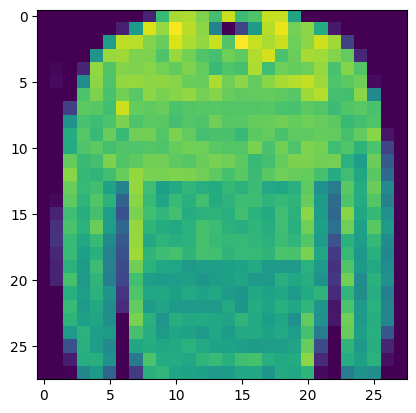

------******------

Incorrect classification:
Actual label: 5
Predicted label: 7


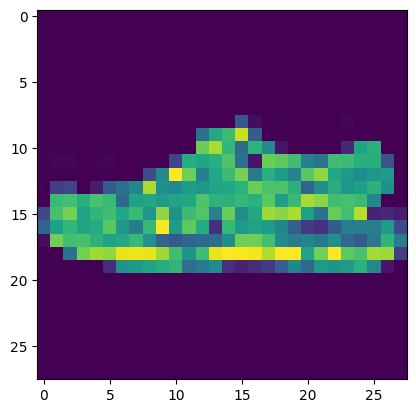

------******------

Incorrect classification:
Actual label: 9
Predicted label: 7


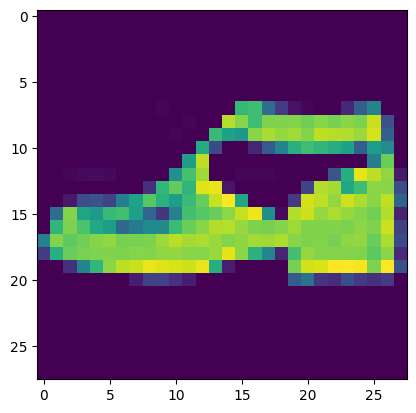

------******------

Incorrect classification:
Actual label: 4
Predicted label: 2


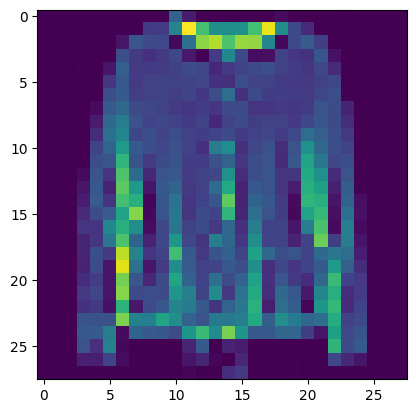

------******------

Incorrect classification:
Actual label: 7
Predicted label: 5


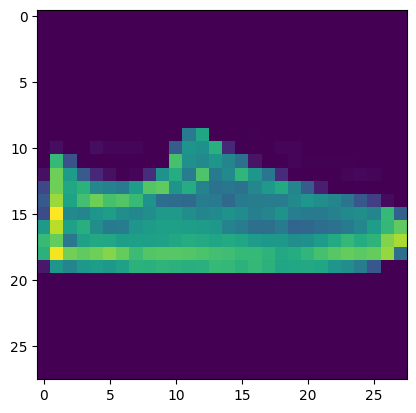

------******------

Incorrect classification:
Actual label: 4
Predicted label: 8


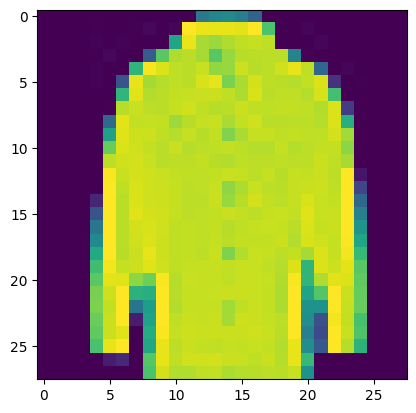

------******------

Incorrect classification:
Actual label: 9
Predicted label: 5


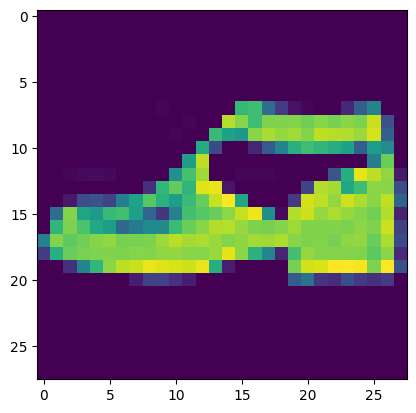

------******------

Incorrect classification:
Actual label: 4
Predicted label: 2


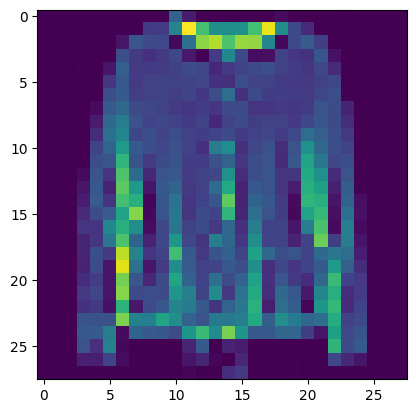

------******------

Incorrect classification:
Actual label: 0
Predicted label: 3


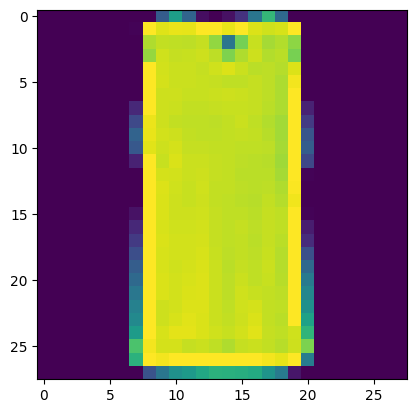

------******------

Incorrect classification:
Actual label: 2
Predicted label: 6


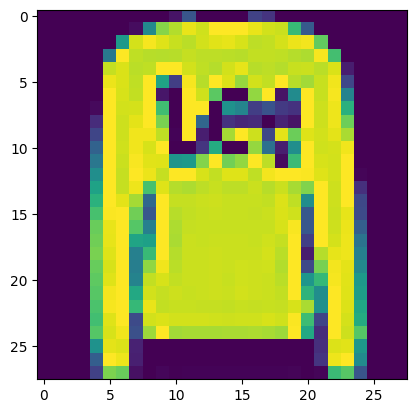

------******------

Incorrect classification:
Actual label: 7
Predicted label: 5


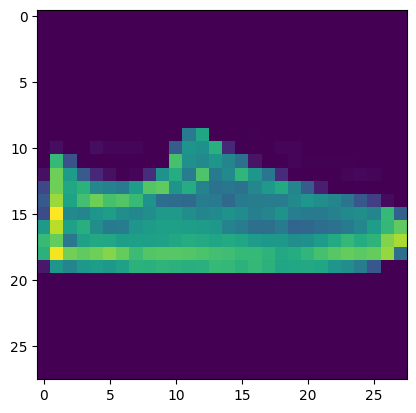

------******------

Incorrect classification:
Actual label: 2
Predicted label: 6


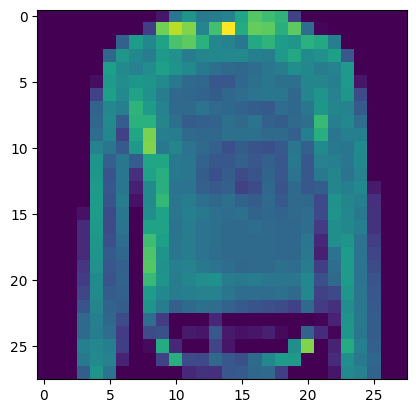

------******------

Incorrect classification:
Actual label: 0
Predicted label: 6


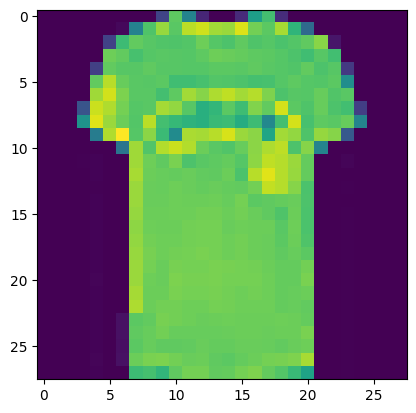

------******------

Incorrect classification:
Actual label: 2
Predicted label: 6


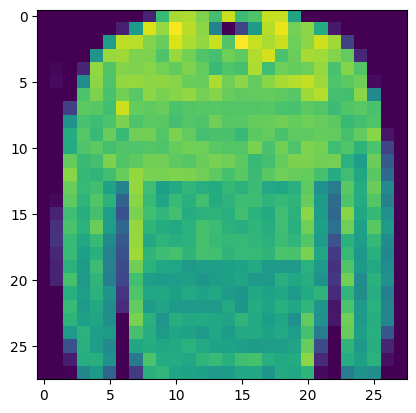

------******------

Incorrect classification:
Actual label: 7
Predicted label: 5


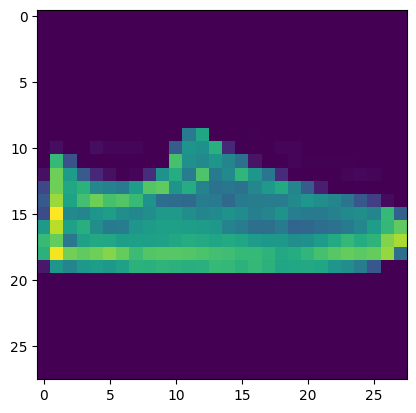

------******------

Incorrect classification:
Actual label: 4
Predicted label: 2


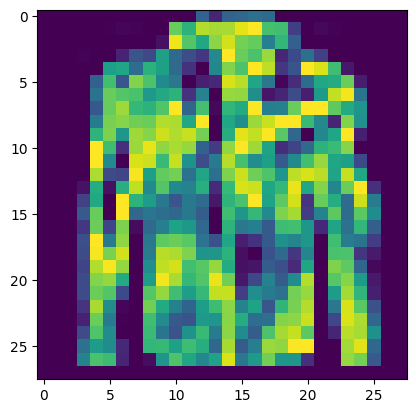

------******------

Incorrect classification:
Actual label: 2
Predicted label: 0


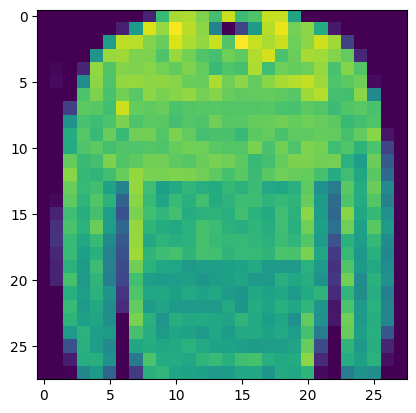

------******------

Incorrect classification:
Actual label: 4
Predicted label: 2


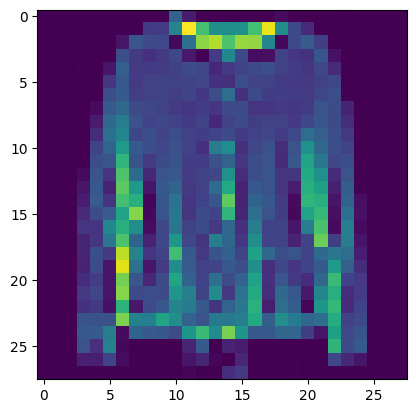

------******------

Incorrect classification:
Actual label: 3
Predicted label: 4


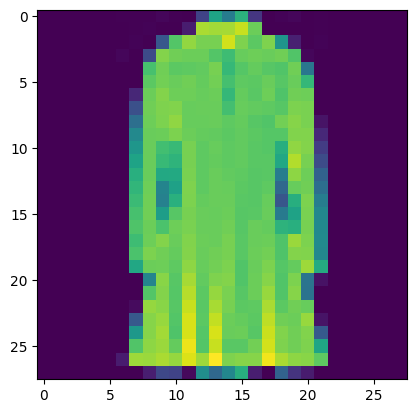

------******------

		*****************************
		******* Model: Model_4 *******
		*****************************

Incorrect classification:
Actual label: 7
Predicted label: 5


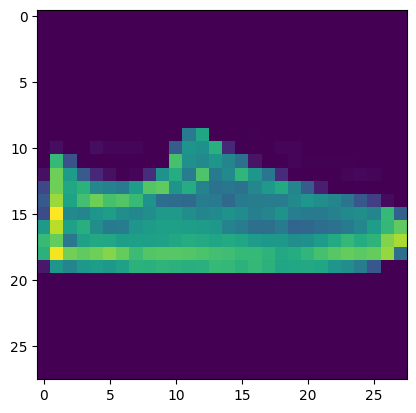

------******------

Incorrect classification:
Actual label: 2
Predicted label: 0


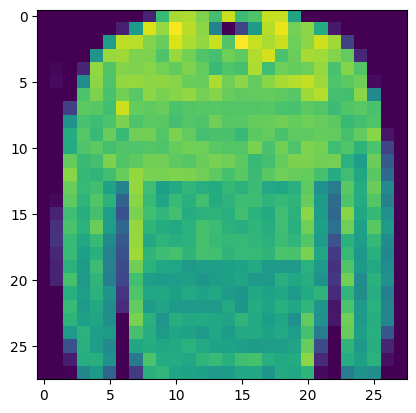

------******------

Incorrect classification:
Actual label: 5
Predicted label: 7


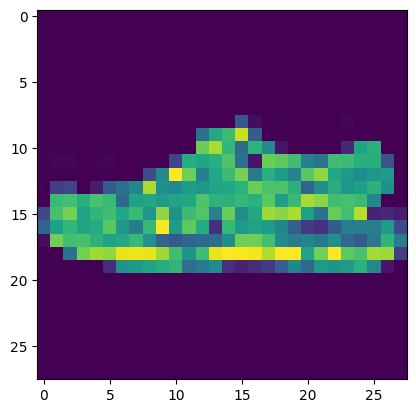

------******------

Incorrect classification:
Actual label: 9
Predicted label: 7


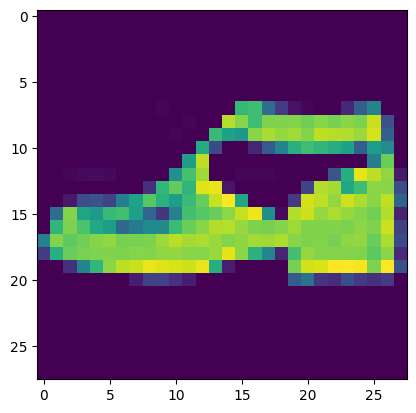

------******------

Incorrect classification:
Actual label: 4
Predicted label: 2


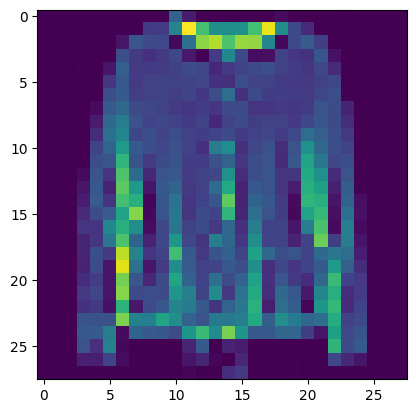

------******------

Incorrect classification:
Actual label: 7
Predicted label: 5


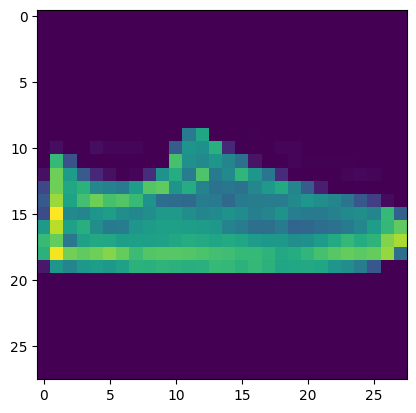

------******------

Incorrect classification:
Actual label: 4
Predicted label: 8


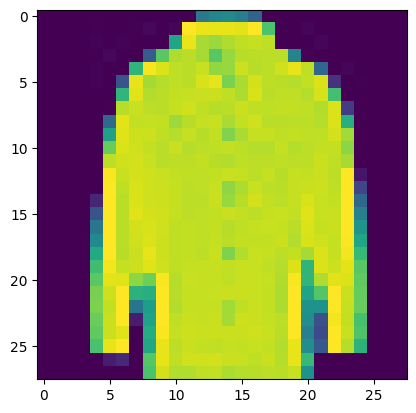

------******------

Incorrect classification:
Actual label: 9
Predicted label: 5


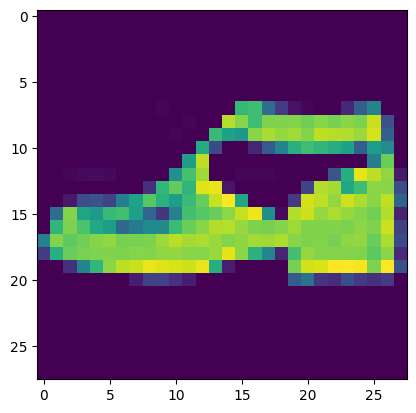

------******------

Incorrect classification:
Actual label: 4
Predicted label: 2


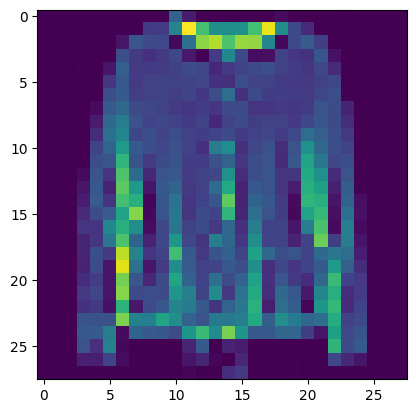

------******------

Incorrect classification:
Actual label: 0
Predicted label: 3


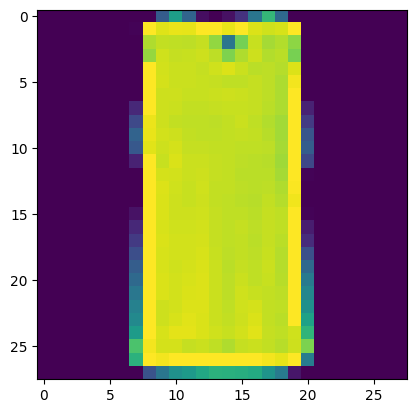

------******------

Incorrect classification:
Actual label: 2
Predicted label: 6


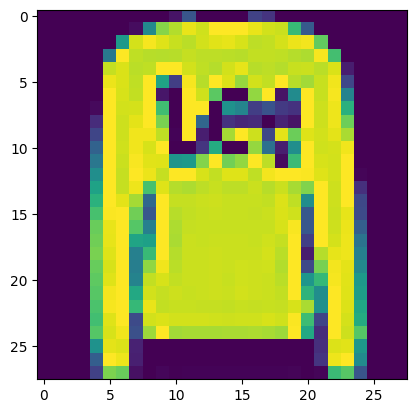

------******------

Incorrect classification:
Actual label: 7
Predicted label: 5


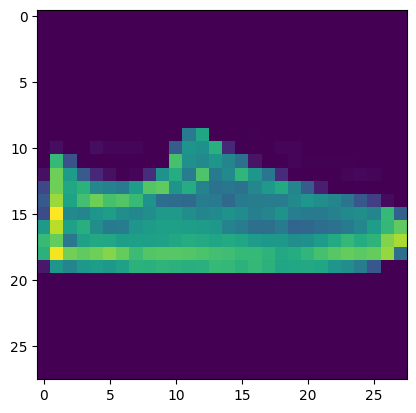

------******------

Incorrect classification:
Actual label: 2
Predicted label: 6


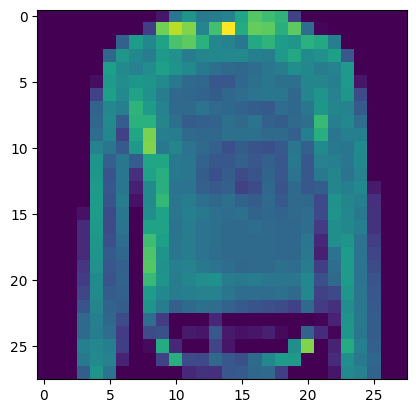

------******------

Incorrect classification:
Actual label: 0
Predicted label: 6


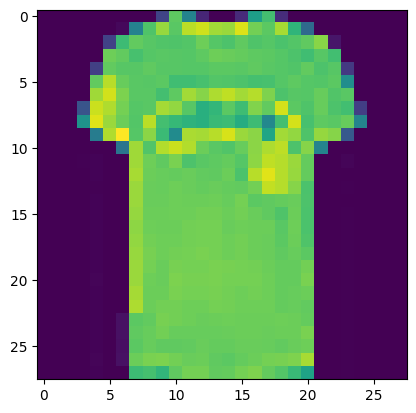

------******------

Incorrect classification:
Actual label: 2
Predicted label: 6


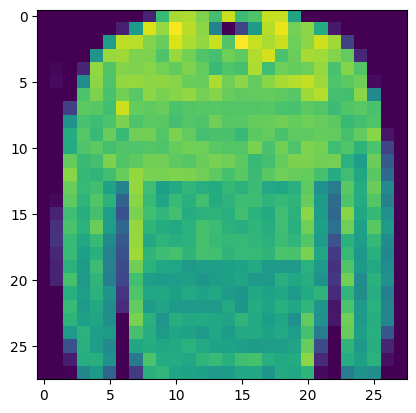

------******------

Incorrect classification:
Actual label: 7
Predicted label: 5


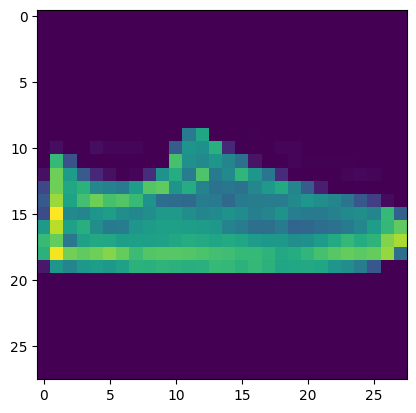

------******------

Incorrect classification:
Actual label: 4
Predicted label: 2


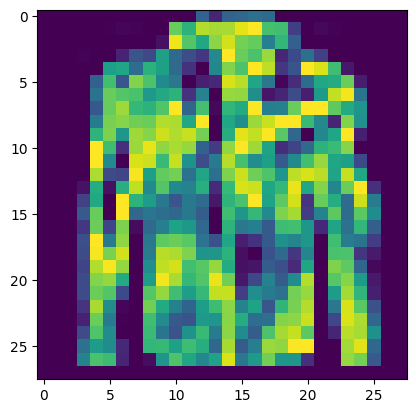

------******------

Incorrect classification:
Actual label: 2
Predicted label: 0


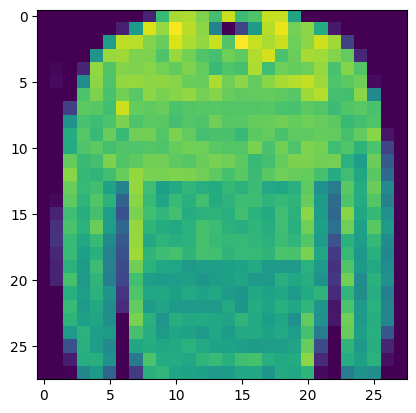

------******------

Incorrect classification:
Actual label: 4
Predicted label: 2


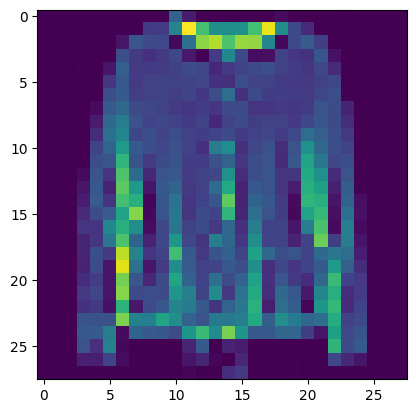

------******------

Incorrect classification:
Actual label: 3
Predicted label: 4


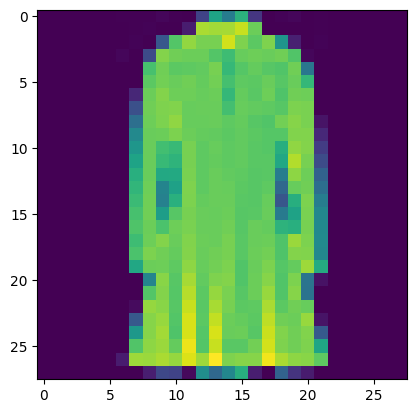

------******------



In [15]:
model_index = 0
while model_index < len(models_list):
    print('\t\t*****************************\n\t\t******* Model: {} *******\n\t\t*****************************\n'
          .format(models_list[model_index].name))
    for predictions in predictions_list:
        incorrect_predictions = np.where(predictions != test_labels)[0]
        for i in range(5):
            incorrect_image = test_images[incorrect_predictions[i]]
            incorrect_label = test_labels[incorrect_predictions[i]]
            predicted_label = predictions[incorrect_predictions[i]]
            print('Incorrect classification:')
            print('Actual label:', incorrect_label)
            print('Predicted label:', predicted_label)
            plt.imshow(incorrect_image)
            plt.show()
            print('------******------\n')
    model_index += 1

#### **Best Configuration**

Model: "Model_2"

Accuracy: 82.05%

Confusion Matrix:
| Predicted Class | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
|---|---|---|---|---|---|---|---|---|---|---|
| 0 | 865 | 2 | 5 | 76 | 7 | 0 | 33 | 0 | 11 | 1 |
| 1 | 4 | 948 | 1 | 36 | 5 | 0 | 5 | 0 | 1 | 0 |
| 2 | 53 | 4 | 430 | 24 | 336 | 1 | 143 | 0 | 9 | 0 |
| 3 | 32 | 6 | 0 | 921 | 25 | 1 | 10 | 0 | 5 | 0 |
| 4 | 1 | 1 | 18 | 63 | 864 | 0 | 46 | 0 | 7 | 0 |
| 5 | 0 | 0 | 0 | 1 | 0 | 900 | 0 | 71 | 5 | 23 |
| 6 | 241 | 1 | 41 | 75 | 235 | 0 | 390 | 0 | 17 | 0 |
| 7 | 0 | 0 | 0 | 0 | 0 | 24 | 0 | 969 | 0 | 7 |
| 8 | 11 | 1 | 0 | 13 | 7 | 3 | 11 | 5 | 949 | 0 |
| 9 | 1 | 0 | 0 | 0 | 0 | 7 | 1 | 98 | 1 | 892 |


- The model classified an image of a label 5 as 7.
- The model classified an image of a label 4 as 2.
- The model classified an image of a label 6 as 1 and 4.
